In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

In [101]:
data = pd.read_csv('C:\\Users\\YashnaBehera\\Downloads\\loan.csv')

In [102]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [105]:
data['Loan_ID'] = data['Loan_ID'].astype('category')#nominal
data['Gender'] = data['Gender'].astype('category')#nominal
data['Married'] = data['Married'].astype('category')#nominal
data['Dependents'] = data['Dependents'].astype('category')#ordinal
data['Education'] = data['Education'].astype('category')#ordinal
data['Self_Employed'] = data['Self_Employed'].astype('category')#Nominal
data['Property_Area'] = data['Property_Area'].astype('category')#ordinal
data['Loan_Status'] = data['Loan_Status'].astype('category')#nominal
data['Credit_History'] = data['Credit_History'].astype('category')#nominal
data.select_dtypes(include=['category',"object"]).dtypes

Loan_ID           category
Gender            category
Married           category
Dependents        category
Education         category
Self_Employed     category
Credit_History    category
Property_Area     category
Loan_Status       category
dtype: object

### Q 1: Identify the categorical features, Seggregate the nominal features from Ordinal features ?

**ordinal** 
    Dependents,Education,Property Area
    
**nominal** 
    Loan_ID,Gender,Married,Self Employed,Loan_Status,Credit History

### Q 2: Identify the distribution of all categorical features ?

In [32]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

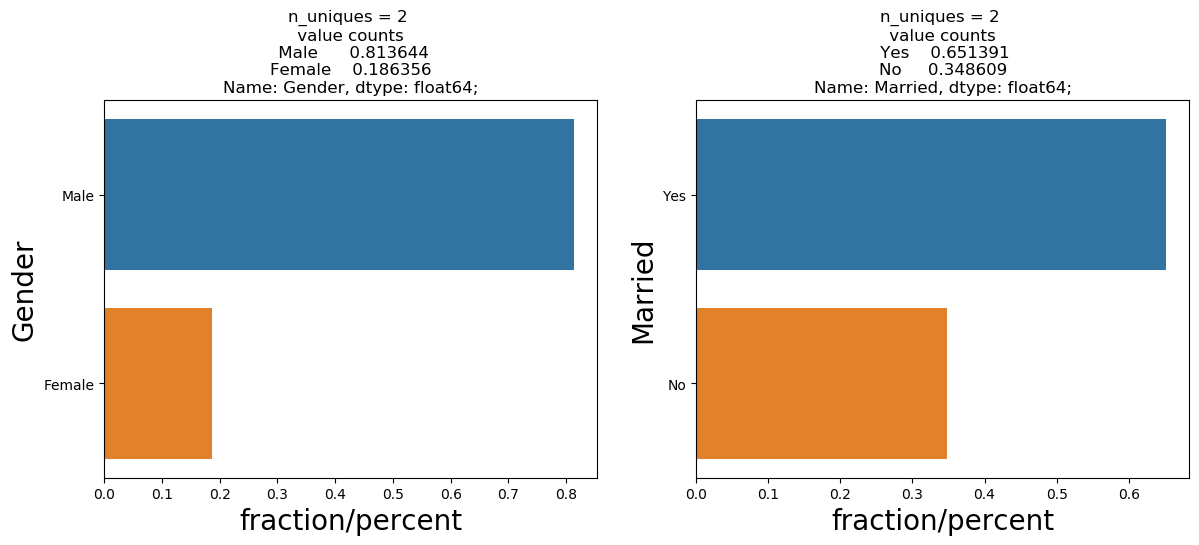

In [36]:
UVA_category(data, ['Gender','Married'])

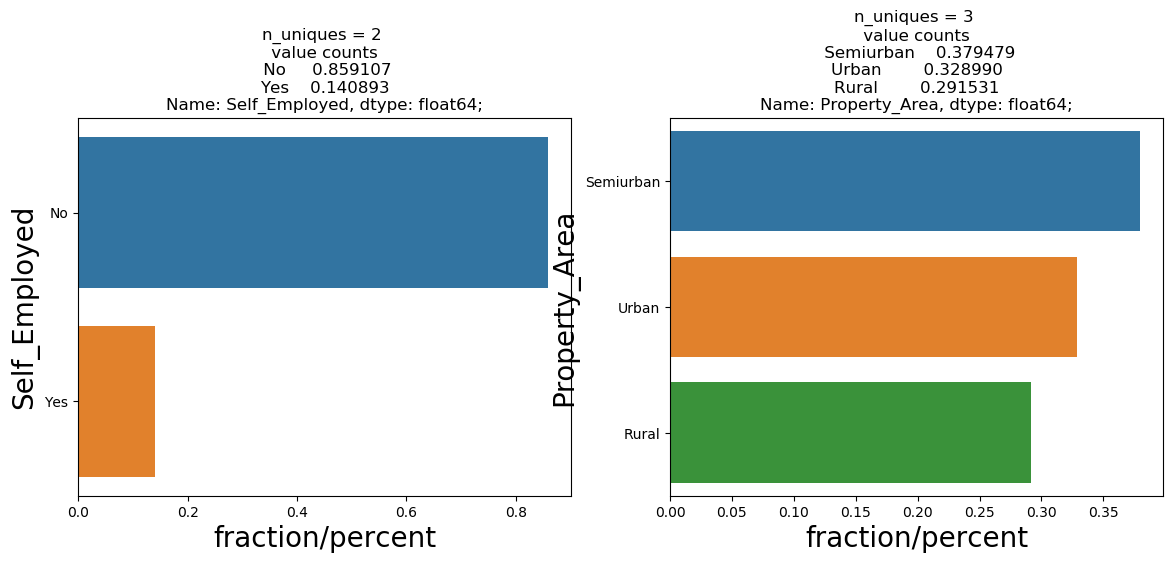

In [38]:
UVA_category(data, ['Self_Employed','Property_Area'])

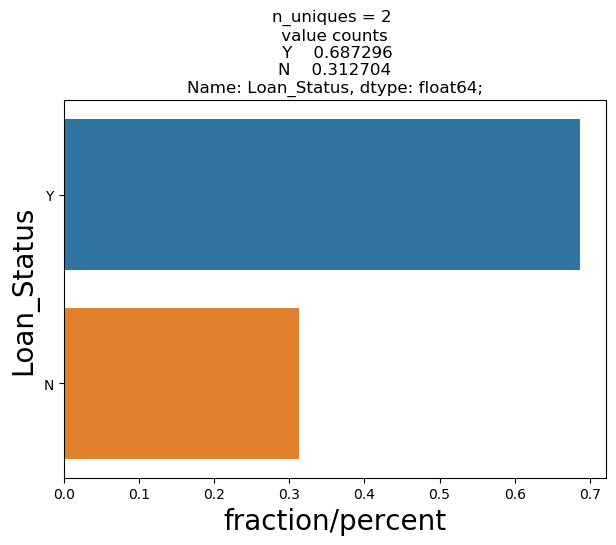

In [37]:
UVA_category(data, ['Loan_Status'])

### Q 3: Impute the mode value for all the missing values in the categorical columns ?

In [39]:
for column in ['Gender','Married','Self_Employed','Property_Area','Loan_Status']:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [41]:
data[['Gender','Married','Self_Employed','Property_Area','Loan_Status']].isnull().sum()

Gender           0
Married          0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

### Q 4: Check CLT Theorem for all the continuous variable in the data ? Also plot all the descriptive statistics for the sampled data ?

In [45]:
data.select_dtypes(include=['float64']).dtypes

CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [75]:
continuous_var=data.sample(213)
continuous_var.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
230,LP001765,Male,Yes,1,Graduate,No,2491,2054.0,104.0,360.0,1.0,Semiurban,Y
133,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y
405,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,Y
488,LP002555,Male,Yes,2,Graduate,Yes,4583,2083.0,160.0,360.0,1.0,Semiurban,Y
559,LP002804,Female,Yes,0,Graduate,No,4180,2306.0,182.0,360.0,1.0,Semiurban,Y


In [76]:
print("mean_CoapplicantIncome:", continuous_var["CoapplicantIncome"].mean())
print("median_CoapplicantIncome:", continuous_var["CoapplicantIncome"].median())

print("mean_LoanAmount:", continuous_var["LoanAmount"].mean())
print("median_LoanAmount:", continuous_var["LoanAmount"].median())

print("mean_Loan_Amount_Term:", continuous_var["Loan_Amount_Term"].mean())
print("median_Loan_Amount_Term:", continuous_var["Loan_Amount_Term"].median())

print("mean_Credit_History:", continuous_var["Credit_History"].mean())
print("median_Credit_History:", continuous_var["Credit_History"].median())


mean_CoapplicantIncome: 1395.2015022940845
median_CoapplicantIncome: 688.0
mean_LoanAmount: 149.74384236453201
median_LoanAmount: 130.0
mean_Loan_Amount_Term: 335.8840579710145
median_Loan_Amount_Term: 360.0
mean_Credit_History: 0.8592964824120602
median_Credit_History: 1.0


In [129]:
def UVA_numeric(data, var_group):

  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    plt.hist(x = data[i], bins = 10,histtype='barstacked')
    sns.lineplot(x = points, y = [5, 5], color = 'green', label = "std_dev")
    sns.scatterplot(x = [mini,maxi], y = [0, 0], color = 'orange', label = "min/max")
    plt.vlines(x = [mean],ymin=0, ymax=105, color = 'red', label = "mean")
    plt.vlines(x = [median],ymin=0, ymax=105, color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                    round(kurt,2),
                                                                                                    round(skew,2),
                                                                                                    (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                    round(mean,2),
                                                                                                    round(median,2)))

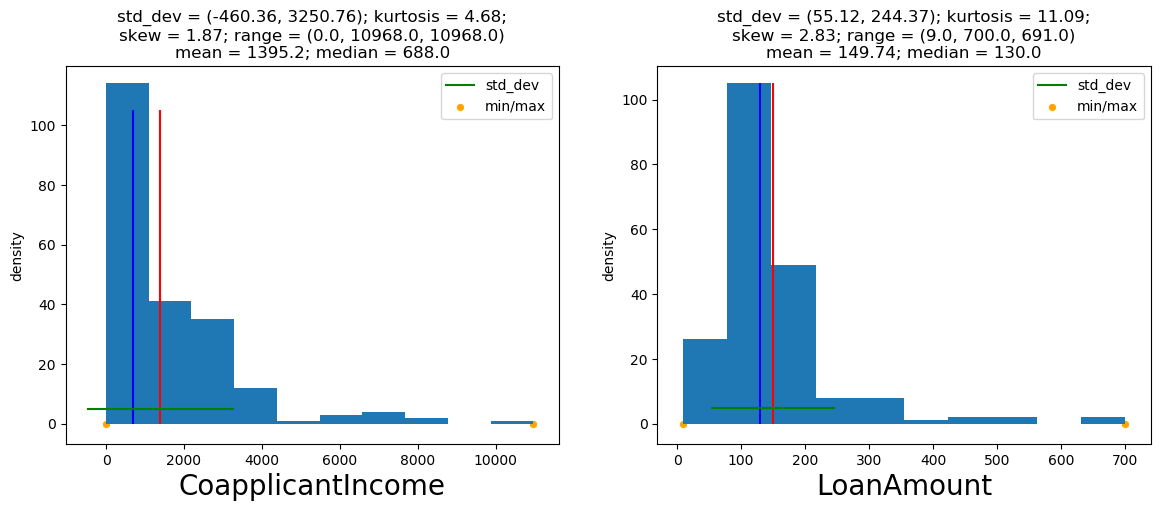

In [130]:
UVA_numeric(continuous_var, ['CoapplicantIncome','LoanAmount'])

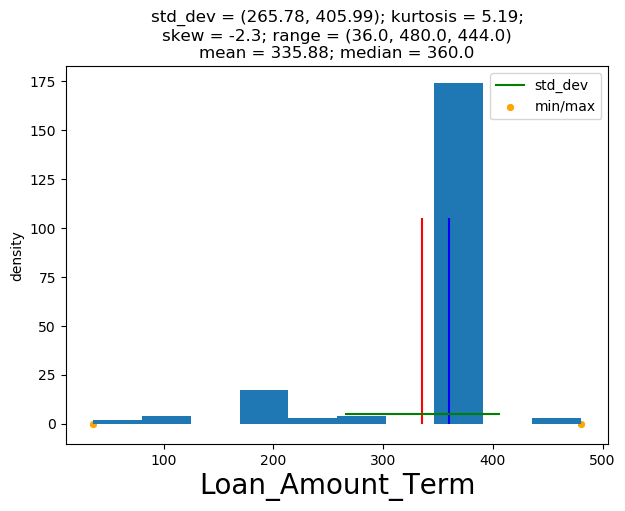

In [131]:
UVA_numeric(continuous_var, ['Loan_Amount_Term'])